In [8]:
import pandas as pd

In [9]:
import os
import json
import glob

In [10]:
p="/Users/tillermold/Desktop/CODE/SE/Projects/xeno/dataset/metadata/cnt_Germany/"

### Importing all files for Germany

In [11]:
list_dir = os.listdir(p)

print(list_dir)

['page37.json', 'page2.json', 'page21.json', 'page56.json', 'page17.json', 'page40.json', 'page41.json', 'page16.json', 'page20.json', 'page3.json', 'page36.json', 'page8.json', 'page50.json', 'page11.json', 'page46.json', 'page31.json', 'page4.json', 'page27.json', 'page26.json', 'page5.json', 'page30.json', 'page47.json', 'page10.json', 'page51.json', 'page9.json', 'page44.json', 'page13.json', 'page52.json', 'page29.json', 'page48.json', 'page25.json', 'page6.json', 'page33.json', 'page32.json', 'page7.json', 'page24.json', 'page49.json', 'page28.json', 'page53.json', 'page12.json', 'page45.json', 'page19.json', 'page23.json', 'page35.json', 'page42.json', 'page15.json', 'page54.json', 'page39.json', 'page38.json', 'page55.json', 'page14.json', 'page43.json', 'page34.json', 'page1.json', 'page22.json', 'page18.json']


In [12]:
#df = pd.read_json("./dataset/metadata/cnt_Germany/page1.json")
#df.head(3)

with open('./dataset/metadata/cnt_Germany/page1.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)
df.to_csv('page1.csv')

## Concatenating all JSON-files and converting them into a single data frame

In [51]:
import pandas as pd
import glob
path = './dataset/metadata/cnt_Germany/*.json'
files = glob.glob(path)

data_frames = []

for file in files:
    f = open(file, 'r')
    data_frames.append(pd.read_json(f))
    f.close()

df_ger = pd.concat(data_frames)
df_ger_norm = pd.json_normalize(df_ger["recordings"])
df_ger_norm

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,date,uploaded,also,rmk,bird-seen,playback-used,sono.small,sono.med,sono.large,sono.full
0,709930,Turdus,viscivorus,,Mistle Thrush,Sven Kransel,Germany,"Hanover Region (near Uetze), Lower Saxony",52.4351,10.125,...,2022-03-05,2022-03-20,[],Tascam DR-05X – unattended-72h-recording - not...,no,no,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...
1,639796,Turdus,viscivorus,,Mistle Thrush,Sven Kransel,Germany,"Uelzen (near Eimke), Niedersachsen",52.9549,10.282,...,2021-04-17,2021-04-17,"[Picus viridis, Phylloscopus trochilus, Phyllo...",,yes,no,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...
2,626430,Turdus,viscivorus,,Mistle Thrush,Jochen Völlm,Germany,"Enzkreis (near Pforzheim), Karlsruhe, Baden-W...",48.8653,8.764,...,2021-02-28,2021-03-05,"[Parus major, Poecile palustris]",,yes,no,//xeno-canto.org/sounds/uploaded/GAJUUNGKMM/ff...,//xeno-canto.org/sounds/uploaded/GAJUUNGKMM/ff...,//xeno-canto.org/sounds/uploaded/GAJUUNGKMM/ff...,//xeno-canto.org/sounds/uploaded/GAJUUNGKMM/ff...
3,596276,Turdus,viscivorus,,Mistle Thrush,W. Agster,Germany,"Frankfurt am Main, Darmstadt, Hessen",50.1684,8.758,...,2020-10-13,2020-10-19,[],,yes,no,//xeno-canto.org/sounds/uploaded/EXNUFPZKKY/ff...,//xeno-canto.org/sounds/uploaded/EXNUFPZKKY/ff...,//xeno-canto.org/sounds/uploaded/EXNUFPZKKY/ff...,//xeno-canto.org/sounds/uploaded/EXNUFPZKKY/ff...
4,563155,Turdus,viscivorus,,Mistle Thrush,Frank Holzapfel,Germany,"Naturpark Stromberg-Heuchelberg, Baden-Württem...",49.0211,9.0244,...,2020-03-28,2020-05-29,[],Unattended recording from frequently used fore...,no,no,//xeno-canto.org/sounds/uploaded/NKZQLCJFUU/ff...,//xeno-canto.org/sounds/uploaded/NKZQLCJFUU/ff...,//xeno-canto.org/sounds/uploaded/NKZQLCJFUU/ff...,//xeno-canto.org/sounds/uploaded/NKZQLCJFUU/ff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27654,701009,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,Germany,"Dorfende Stoffen (near Lengenfeld), Oberbayer...",48.0058,10.9024,...,2022-01-18,2022-02-08,"[Corvus frugilegus, Anser anser]",,yes,no,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...
27655,700066,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,Germany,"Dorfende Stoffen (near Lengenfeld), Oberbayer...",48.0058,10.9024,...,2022-01-18,2022-02-02,[],this full moon day all Great Tits seem to sin...,yes,no,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...
27656,699939,Parus,major,,Great Tit,Beatrix Saadi-Varchmin,Germany,"Kirchstr. 23, Hagenheim/Hofstetten, near Land...",47.9984,10.9503,...,2021-12-24,2022-02-01,[],"weather about 0°C, mild. A Great Tit sings its...",yes,no,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...
27657,699168,Parus,major,,Great Tit,Mathias Götz,Germany,"München (near Taufkirchen), Oberbayern, Bayern",48.0481,11.602,...,2022-01-26,2022-01-28,[],,no,no,//xeno-canto.org/sounds/uploaded/FYXGIECAUP/ff...,//xeno-canto.org/sounds/uploaded/FYXGIECAUP/ff...,//xeno-canto.org/sounds/uploaded/FYXGIECAUP/ff...,//xeno-canto.org/sounds/uploaded/FYXGIECAUP/ff...


In [48]:
df_ger_norm.to_csv("data-ger.csv")

In [54]:
import seaborn as sns

<AxesSubplot:xlabel='gen', ylabel='count'>

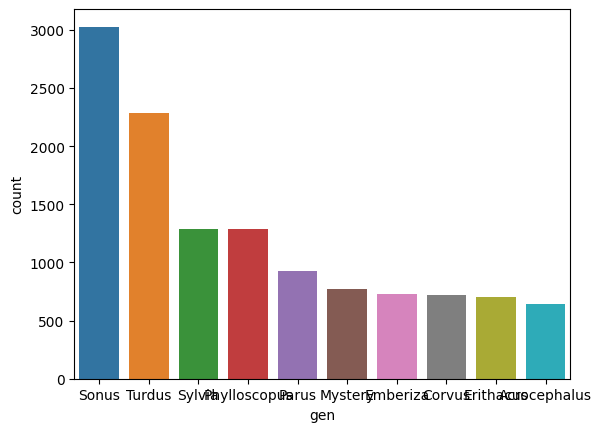

In [55]:
sns.countplot(x="gen", data=df_ger_norm, order=df_ger_norm.gen.value_counts().index[:10])